# Chlorophyll Project
#### There are seventy seabird observational sites across the globe. We want to gather chlorophyll data for a 1km diameter around these points, in a circle.

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [2]:
# make a function (called below) that makes a mask (2d dataset where values to retain are set to 1 and others to nan)
# for a 300km radius area around a given lat/lon pair. 
# note that the area in km is not the same as area in degrees. longitude degrees change distance with latitude.

In [6]:
# if acquiring for the first time (1)
ds_color = xr.open_dataset('https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v5.0-MONTHLY')

In [11]:
ds_color["chlor_a"][0]

<xarray.DataArray 'chlor_a' (lat: 4320, lon: 8640)>
[37324800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
    time     datetime64[ns] 1997-09-04
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

In [12]:
# open CSV
locs = pd.read_csv('NSF_Seabirdsloc_Summer2022.csv')
sites = locs['Site']

# for now, let's take an input. later it will be a function
site = input("Input Desired Site")
if (site == ""):
    site = 'Adams'
sites = sites.tolist()

lon = locs.loc[[sites.index(site)]]['Longitude']
lat = locs.loc[[sites.index(site)]]['Latitude']

print("Working site " + site)

Working site Adams


[-53.6047, -48.200700000000005]
[163.2998, 168.7038]


c:\Users\lespa\miniconda3\envs\local_fi\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\lespa\miniconda3\envs\local_fi\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\lespa\miniconda3\envs\local_fi\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\lespa\miniconda3\envs\local_fi\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.

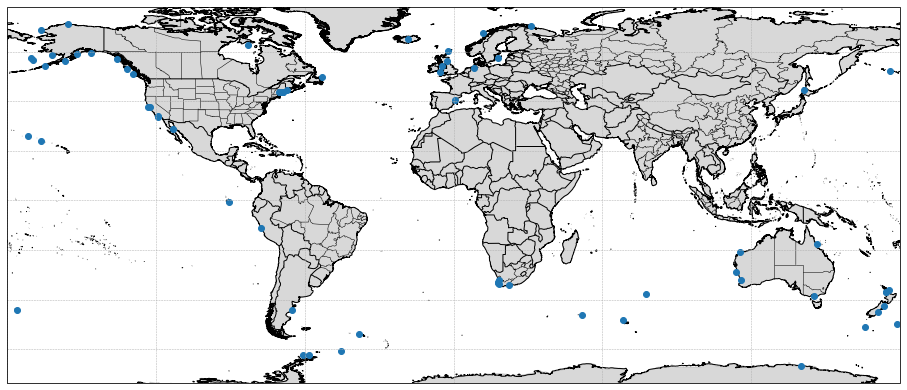

In [13]:
# open CSV
# for each location, select a region +-5 deg, all times
dist = 2.702; # 300 km range
lats = [float(lat-dist), float(lat+dist)]
lons = [float(lon-dist), float(lon+dist)]
print(lats)
print(lons)

data = ds_color['chlor_a'].sel(time = slice('1998-01-01','2019-12-31'),
    lat = slice(lats[0], lats[1]), 
    lon = slice(lons[0], lons[1])
).load()

# Select a region of our data
fig = plt.figure(figsize=(16,10), dpi = 72)
ax = plt.axes(projection=ccrs.PlateCarree())

region = np.array([[lats[0],lats[1]],[lons[0],lons[1]]]) 

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.coastlines(resolution='10m',linewidth=1,color='black')
ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
ax.add_feature(states_provinces, linewidth = 0.5)
ax.add_feature(cfeature.BORDERS, color = 'black')
# ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(linestyle = '--', linewidth = 0.5)

#plot diff data
plt.title("Seabird Observation Locations")

# plot chlorophyll data
data.plot()
# plot point
plt.scatter(locs["Longitude"], locs["Latitude"])

# for x in range( len( locs["Longitude"] ) ): 
#     plt.text(
#         locs["Longitude"][x], locs["Latitude"][x],
#         locs["Site"][x] + ", " + locs["Location"][x],
#         ha='center')
    
plt.show()

# call mask function 


# take a mean in space, and store the time series into a numpy array

# save the arrays as dataarray in a dataset

# add locations as other variables 

In [7]:
# save the file into a netcdf